# 3. MLP

Data de entrega: 21/09/2025

O enunciado da atividade está disponível neste [link](https://insper.github.io/ann-dl/versions/2025.2/exercises/mlp/main).

---

## Config

In [1]:
from utils import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.datasets import make_classification

---

## Exercício 1

In [ ]:
x = np.array([[0.5], [-0.2]])
y = 1

W_hidden = np.array([[0.3, -0.1], [0.2, 0.4]])
b_hidden = np.array([[0.1], [-0.2]])

W_output = np.array([[0.5, -0.3]])
b_output = 0.2

eta = 0.3

# Activation function: tanh(x)
activation_function = lambda x: (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)
activation_function_derivative = lambda x: 1 - (activation_function(x)**2)

# Loss function: MSE
loss_function = lambda y, y_pred: 0.5 * (y - y_pred)**2
loss_function_derivative = lambda y, y_pred: y - y_pred

### MLP

In [ ]:
mlp_data = data.MLP(input=x,
                        output=y,
                        W_hidden=W_hidden,
                        b_hidden=b_hidden,
                        W_output=W_output,
                        b_output=b_output,
                        eta=eta,
                        activation_function=activation_function,
                        activation_function_d=activation_function_derivative,
                        loss_function=loss_function,
                        loss_function_d=loss_function_derivative)

In [ ]:
z1_pre, z1_activation, z2_pre, z2_activation = mlp_data.forward()

loss = mlp_data.loss_calculation(y, z2_activation)

W_hidden_gradient, b_hidden_gradient, W_output_gradient, b_output_gradient = mlp_data.backpropagation(z1_pre, z1_activation, z2_pre, z2_activation)

W_hidden, b_hidden, W_output, b_output = mlp_data.update_weights(W_hidden_gradient, b_hidden_gradient, W_output_gradient, b_output_gradient)

In [ ]:
print(f"New weights hidden layer:")
print(f"{W_hidden}")
print(f"New bias hidden layer:")
print(f"{b_hidden}")
print(f"New weights output layer:")
print(f"{W_output}")
print(f"New biases output layer:")
print(f"{b_output}")

---

## Exercício 2

### Inicialização da amostra

In [2]:
N_FEATURES_2 = 2
N_OUTPUT_2 = 1
N_NEURONS_2 = 10
SAMPLE_SIZE_2 = 1000
TRAIN_SIZE = .8

In [3]:
samples_1_2, samples_labels_1_2 = make_classification(n_samples=SAMPLE_SIZE_2 // 2,
                                                  n_classes=1,
                                                  n_clusters_per_class=1,
                                                  n_features=N_FEATURES_2,
                                                  n_informative=2,
                                                  n_redundant=0,
                                                  random_state=21,
                                                  class_sep=2.0)

samples_2_2, samples_labels_2_2 = make_classification(n_samples=SAMPLE_SIZE_2 // 2,
                                                  n_classes=1,
                                                  n_clusters_per_class=2,
                                                  n_features=N_FEATURES_2,
                                                  n_informative=2,
                                                  n_redundant=0,
                                                  random_state=42,
                                                  class_sep=2.0)

samples_labels_1_2[:] = 0
samples_labels_2_2[:] = 1

In [4]:
samples_total_2 = np.concatenate((samples_1_2, samples_2_2))
samples_total_labels_2 = np.concatenate((samples_labels_1_2, samples_labels_2_2))

shuffled_samples_total_2, shuffled_samples_total_labels_2 = data.shuffle_sample(sample_array=samples_total_2, labels_array=samples_total_labels_2)

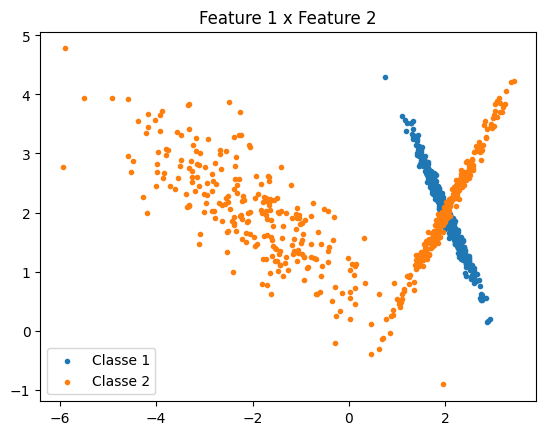

In [5]:
plt.scatter(shuffled_samples_total_2[shuffled_samples_total_labels_2==0, 0], shuffled_samples_total_2[shuffled_samples_total_labels_2==0, 1], label="Classe 1", marker=".")
plt.scatter(shuffled_samples_total_2[shuffled_samples_total_labels_2==1, 0], shuffled_samples_total_2[shuffled_samples_total_labels_2==1, 1],  label="Classe 2", marker=".")

plt.title("Feature 1 x Feature 2")
plt.legend()
plt.show()

### Definindo parâmetros para treinamento

In [6]:
# A função de ativação escolhida foi a sigmoide, pois é um problema de classificação binária (0 e 1) e também por ser uma rede rasa (MLP), onde o problema de o gradiente desaparecer é menos provável de surgir

# Para avaliar o modelo, será usado a função de perda MSE

# O otimizador é o gradiente descendente

# Os pesos serão inicializados utilizando o método de Xavier/Glorot (https://www.geeksforgeeks.org/deep-learning/xavier-initialization), utilizando a inicialização normal

In [7]:
# Definindo o range dos valores da inicialização dos pesos
val = (6 / (N_FEATURES_2 + N_OUTPUT_2))**.5

In [8]:
# Inicializando os pesos
W1_2 = np.random.uniform(-val, val, size=(N_FEATURES_2, N_NEURONS_2))   # n_features X n_neurons
W2_2 = np.random.uniform(-val, val,  size=(N_NEURONS_2, N_OUTPUT_2))   # n_neurons X n_output

In [9]:
# Inicialização dos bias
b1_2 = np.zeros((N_NEURONS_2, 1)) # n_neurons X n_sample (train)
b2_2 = 0

In [10]:
# Dividindo a base de em treinamento e teste
train_sample_2, test_sample_2, train_sample_labels_2, test_sample_labels_2 = data.train_test_split(shuffled_samples_total_2, shuffled_samples_total_labels_2, TRAIN_SIZE)

train_sample_2 = train_sample_2.T # n_features X n_samples
test_sample_2 = test_sample_2.T  # n_features X n_samples

In [11]:
# Normalização das amostras com z-score
train_sample_norm_2 = (train_sample_2 - np.mean(train_sample_2)) / np.std(train_sample_2)

In [12]:
# W1 precisa ter shape (n_feat X n_neuron), quando fizer a transposta, fica (n_neuron X n_feat) e bate com a conta
# (W1^T @ x + b1).shape => (n_neuron X n_sample)
# o bias b1 é aplicado element-wise

In [13]:
# ReLU
relu = lambda x: np.where(x > 0, x, 0)
relu_d = lambda x: np.where(x > 0, 1, 0)

In [14]:
# Definindo a função de ativação e a derivada
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_d = lambda x: sigmoid(x) * (1 - sigmoid(x))

In [15]:
# Definindo função de perda
mse = lambda y, y_pred: 0.5 * (y - y_pred)**2
mse_d = lambda y, y_pred: y - y_pred

eps = 1e-8
bce = lambda y, y_pred: -(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))
bce_d = lambda y, y_pred: (y_pred - y) / ((y_pred + eps) * (1 - y_pred + eps))

### Treino

In [16]:
kwargs = {"input": train_sample_norm_2, 
          "output": train_sample_labels_2, 
          "W_hidden": W1_2, 
          "b_hidden": b1_2, 
          "W_output": W2_2, 
          "b_output": b2_2, 
          "eta": .001, 
          "hidden_activation": sigmoid, 
          "hidden_activation_d": sigmoid_d, 
          "output_activation": sigmoid, 
          "output_activation_d": sigmoid_d, 
          "loss_function": bce, 
          "loss_function_d": bce_d}

In [17]:
# Iniciando o treinamento
mlp_object = data.MLP(**kwargs)

In [18]:
pred = sigmoid(W2_2.T @ sigmoid(W1_2.T @ train_sample_norm_2 + b1_2) + b2_2)

In [19]:
output_layer_error = bce_d(train_sample_labels_2, pred) * sigmoid_d(W2_2.T @ sigmoid(W1_2.T @ train_sample_norm_2 + b1_2) + b2_2)

In [20]:
W2_2.T.shape, output_layer_error.shape

((1, 10), (1, 800))

In [21]:
epoch_losses = {100: [], 300: [], 500: []}
epoch_accuracy = {}

for n_epochs, losses in epoch_losses.items():
    epoch_accuracy[n_epochs] = []

    for epoch in range(n_epochs):
        z1_pre, z1_activation, z2_pre, z2_activation = mlp_object.forward()

        loss = mlp_object.loss_calculation(train_sample_labels_2, z2_activation)
        losses.append(np.mean(loss))
        
        y_pred = (z2_activation > 0.5).astype(int)       # previsões
        acc = np.mean(y_pred == train_sample_labels_2)     # compara com labels
        epoch_accuracy[n_epochs].append(acc)

        W_hidden_gradient, b_hidden_gradient, W_output_gradient, b_output_gradient = mlp_object.backpropagation(z1_pre, z1_activation, z2_pre, z2_activation)

        W_hidden, b_hidden, W_output, b_output = mlp_object.update_weights(W_hidden_gradient, b_hidden_gradient, W_output_gradient, b_output_gradient)

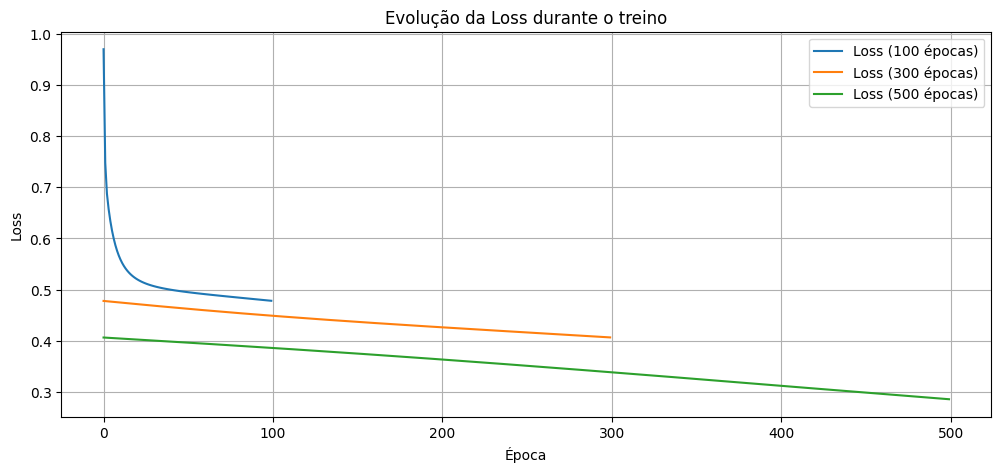

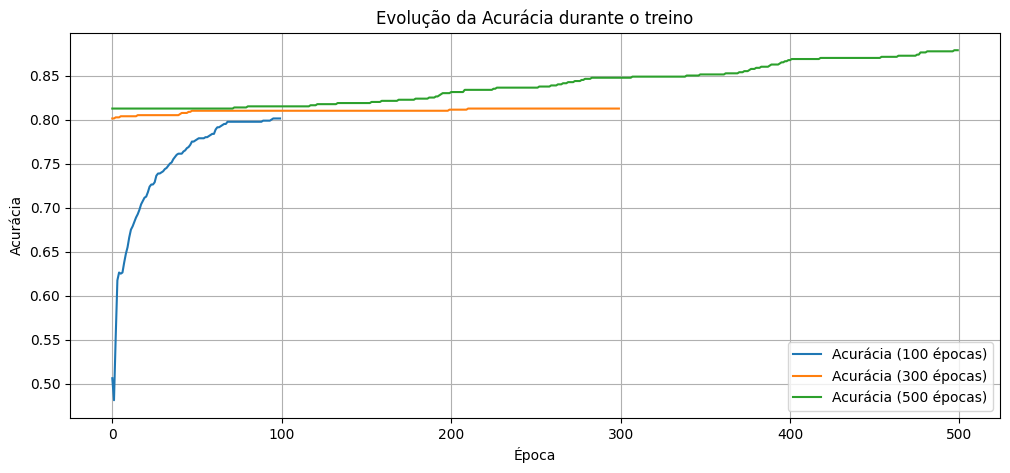

In [27]:
plt.figure(figsize=(12,5))

for n_epochs, losses in epoch_losses.items():
    plt.plot(losses, label=f"Loss ({n_epochs} épocas)")

plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolução da Loss durante o treino")
plt.legend()
plt.grid(True)
plt.show()

# Plot da acurácia
plt.figure(figsize=(12,5))

for n_epochs, accs in epoch_accuracy.items():
    plt.plot(accs, label=f"Acurácia ({n_epochs} épocas)")

plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Evolução da Acurácia durante o treino")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# O valor dos pesos muda pois pega valores aleatórios dentro do range determinado, por isso a forma que as perdas médias são registradas são diferentes a cada vez que o código é rodado
# Em geral, percebe-se que o gráfico apresenta uma função parecida com uma logarítmica, ou seja, o valor das perdas médias aumenta de acordo com o número de épocas 

In [24]:
# basicamente o modelo ficou um lixo com as funções de perda e ativação que utilizei (MSE e ReLU, MSE e sigmoide)

In [25]:
# utilizando Binary Cross-Entropy, a função evolui bem, indicando que a classificação fica boa no final das contas, isto é, a MSE não é uma boa para quando fazemos classificação binária
# Além disso, é melhor usar sigmoide nesse caso, pelo mesmo motivo do uso de BCE

### Teste

In [31]:
test_sample_norm_2 = (test_sample_2 - np.mean(train_sample_2)) / np.std(train_sample_2)

In [32]:
kwargs_test = {
                "input": test_sample_norm_2, 
                "output": test_sample_labels_2, 
                "W_hidden": W_hidden, 
                "b_hidden": b_hidden, 
                "W_output": W_output, 
                "b_output": b_output, 
                "eta": .001, 
                "hidden_activation": sigmoid, 
                "hidden_activation_d": sigmoid_d, 
                "output_activation": sigmoid, 
                "output_activation_d": sigmoid_d, 
                "loss_function": bce, 
                "loss_function_d": bce_d
                }

In [33]:
# Iniciando o treinamento
mlp_object_test = data.MLP(**kwargs_test)

In [34]:
z1_pre_test, z1_activation_test, z2_pre_test, z2_activation_test = mlp_object_test.forward()

In [36]:
loss_test = mlp_object_test.loss_calculation(test_sample_labels_2, z2_activation_test)

In [43]:
THRESHOLD = .5 # nível de confiança

y_pred = (z2_activation_test > THRESHOLD).astype(int)
acc_test = np.mean(y_pred == test_sample_labels_2)

In [44]:
print(f"Acurácia do treino: {acc_test * 100:.2f}%")

Acurácia do treino: 87.88%


In [ ]:
# o valor de z2_activation significa a probabilidade de a classe prevista ser 1
# logo, quando determino um threshold, estou pensando na confiança da previsão. Se o threshold é de 90%, por exemplo, só aponto que a classe é 1 se a ativação retornar um valor maior ou igual a 90%
# Esse limite depende do problema que estamos tratando, por exemplo, ao prever doenças em pacientes queremos que o número de falsos negativos seja baixo, então aceitamos valores cuja probabilidade é maior que um threshold BAIXO, ou seja, ele pega mais amostras que foram classificadas como TRUE, o que não é um problema para essa situação (falsos positivos são aceitáveis -> melhor que falsos negativos)
# Isso também vale para, por exemplo, previsão de fraudes em bancos, em que não queremos a conta seja bloqueada quando uma fraude é detectada quando não é de fato (falso positivo). Nesse caso, aumentamos o thresold para deixar mais permissivo o nosso critério de aceitar positivos (serão aceitos principalmente verdadeiros positivos, quando realmente é fraude)
# Podemos determinar esse limite com uma curva AUC-ROC

___

## Exercício 3

### Inicialização da amostra

In [440]:
SAMPLE_SIZE_3           = 1500
N_FEATURES_3            = 4
N_INFORMATIVE_3         = 4
N_REDUNDANT_3           = 0
random_state            = {"classe 0": 21, 
                       "classe 1": 42, 
                       "classe 2": 84}
n_cluters_per_class     = {"classe 0": 2, 
                       "classe 1": 3, 
                       "classe 2": 4}
CLASS_SEP_3             = 2.0
N_CLASSES_3             = 3
N_NEURONS_3             = 128

In [441]:
samples_0_3, samples_labels_0_3 = make_classification(n_samples=SAMPLE_SIZE_3 // 3,
                                                  n_classes=1,
                                                  n_clusters_per_class=n_cluters_per_class["classe 0"],
                                                  n_features=N_FEATURES_3,
                                                  n_informative=N_INFORMATIVE_3,
                                                  n_redundant=N_REDUNDANT_3,
                                                  random_state=random_state["classe 0"],
                                                  class_sep=CLASS_SEP_3)

samples_1_3, samples_labels_1_3 = make_classification(n_samples=SAMPLE_SIZE_3 // 3,
                                                  n_classes=1,
                                                  n_clusters_per_class=n_cluters_per_class["classe 1"],
                                                  n_features=N_FEATURES_3,
                                                  n_informative=N_INFORMATIVE_3,
                                                  n_redundant=N_REDUNDANT_3,
                                                  random_state=random_state["classe 1"],
                                                  class_sep=CLASS_SEP_3)

samples_2_3, samples_labels_2_3 = make_classification(n_samples=SAMPLE_SIZE_3 // 3,
                                                  n_classes=1,
                                                  n_clusters_per_class=n_cluters_per_class["classe 2"],
                                                  n_features=N_FEATURES_3,
                                                  n_informative=N_INFORMATIVE_3,
                                                  n_redundant=N_REDUNDANT_3,
                                                  random_state=random_state["classe 2"],
                                                  class_sep=CLASS_SEP_3)

samples_labels_0_3[:] = 0
samples_labels_1_3[:] = 1
samples_labels_2_3[:] = 2

In [442]:
samples_total_3 = np.concatenate((samples_0_3, samples_1_3, samples_2_3))
samples_total_labels_3 = np.concatenate((samples_labels_0_3, samples_labels_1_3, samples_labels_2_3))

shuffled_samples_total_3, shuffled_samples_total_labels_3 = data.shuffle_sample(sample_array=samples_total_3, labels_array=samples_total_labels_3)

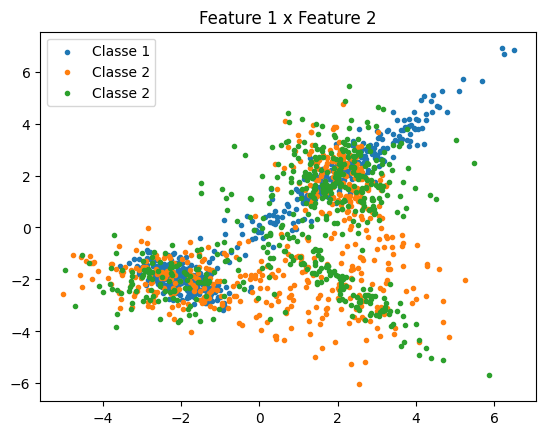

In [443]:
plt.scatter(shuffled_samples_total_3[shuffled_samples_total_labels_3==0, 0], shuffled_samples_total_3[shuffled_samples_total_labels_3==0, 1], label="Classe 1", marker=".")
plt.scatter(shuffled_samples_total_3[shuffled_samples_total_labels_3==1, 0], shuffled_samples_total_3[shuffled_samples_total_labels_3==1, 1],  label="Classe 2", marker=".")
plt.scatter(shuffled_samples_total_3[shuffled_samples_total_labels_3==2, 0], shuffled_samples_total_3[shuffled_samples_total_labels_3==2, 1],  label="Classe 2", marker=".")

plt.title("Feature 1 x Feature 2")
plt.legend()
plt.show()

### Definindo hiperparâmetros para treinamento

In [444]:
val = (6 / (N_FEATURES_3 + N_CLASSES_3))**.5

In [445]:
W1_3 = np.random.uniform(-val, val, size=(N_FEATURES_3, N_NEURONS_3))
W2_3 = np.random.uniform(-val, val, size=(N_NEURONS_3, N_CLASSES_3))

In [446]:
b1_3 = np.zeros((N_NEURONS_3, 1))
b2_3 = np.zeros((N_CLASSES_3, 1))

In [447]:
# Dividindo a base de em treinamento e teste
train_sample_3, test_sample_3, train_sample_labels_3, test_sample_labels_3 = data.train_test_split(shuffled_samples_total_3, shuffled_samples_total_labels_3)

# Deixando a amostra no formato correto para operação no forward e backward pass
train_sample_3 = train_sample_3.T
test_sample_3 = test_sample_3.T

In [448]:
mu  = np.mean(train_sample_3, axis=1, keepdims=True)
std = np.std(train_sample_3, axis=1, keepdims=True) + 1e-8

train_sample_norm_3 = (train_sample_3 - mu) / std
test_sample_norm_3  = (test_sample_3  - mu) / std   # usa o mesmo mu/std do treino

In [449]:
# Sigmoide + derivada
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_d = lambda x: sigmoid(x) * (1 - sigmoid(x))

In [450]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

In [451]:
def cce(y, y_pred, eps=1e-8):
    N = y.shape[1]
    return -np.sum(y * np.log(y_pred + eps)) / N

def cce_d(y, y_pred):
    N = y.shape[1]
    return (y_pred - y) / N

In [452]:
# ReLU
relu = lambda x: np.where(x > 0, x, 0)
relu_d = lambda x: np.where(x > 0, 1, 0)

In [453]:
# Definindo a função de ativação e a derivada
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_d = lambda x: sigmoid(x) * (1 - sigmoid(x))

In [454]:
tanh = lambda x: (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
tanh_d = lambda x: 1 - tanh(x)**2

In [455]:
def to_one_hot(y_idx, num_classes):
    N = y_idx.shape[0]
    labels = np.zeros((num_classes, N))
    labels[y_idx, np.arange(N)] = 1
    return labels

In [456]:
train_labels_onehot_3 = to_one_hot(train_sample_labels_3, N_CLASSES_3)

### Treino

In [457]:
THRESHOLD_3 = .5
activation_array = [tanh, softmax]
activation_d_array = [tanh_d, None]

In [458]:
kwargs_train_3 = {
                  "input": train_sample_norm_3, 
                  "output": train_labels_onehot_3, 
                  "W_hidden": W1_3, 
                  "b_hidden": b1_3, 
                  "W_output": W2_3, 
                  "b_output": b2_3, 
                  "eta": .001, 
                  "hidden_activation": activation_array[0], 
                  "hidden_activation_d": activation_d_array[0], 
                  "output_activation": activation_array[1],
                  "output_activation_d": activation_d_array[1], 
                  "loss_function": cce,
                  "loss_function_d": cce_d
                 }

In [459]:
# Iniciando o treinamento
mlp_object_train_3 = data.MLP(**kwargs_train_3)

In [ ]:
epoch_losses_3 = {100: [], 300: [], 500: []}
epoch_accuracy_3 = {}

batch_size = 32
N = train_sample_norm_3.shape[1]

for n_epochs, losses in epoch_losses_3.items():
    epoch_accuracy_3[n_epochs] = []

    for epoch in range(n_epochs):
        epoch_correct = 0
        epoch_count = 0
        epoch_loss_accum = 0.0

        for start in range(0, N, batch_size):
            end = min(start + batch_size, N)

            sample_batch = train_sample_norm_3[:, start:end]
            labels_batch = train_labels_onehot_3[:, start:end]

            mlp_object_train_3.input = sample_batch
            mlp_object_train_3.output = labels_batch

            z1_pre_train_3, z1_activation_train_3, z2_pre_train_3, z2_activation_train_3 = mlp_object_train_3.forward(
            )

            # ==============================================================
            # Armazenando a loss para plotar no gráfico depois
            loss = mlp_object_train_3.loss_calculation(labels_batch,
                                                       z2_activation_train_3)
            if np.ndim(loss) > 0:
                loss = np.mean(loss)

            B = end - start
            epoch_loss_accum += loss * B
            # ==============================================================

            # ==============================================================
            # Armazenando a acurácia do modelo para plotar no gráfico depois
            preds_idx = np.argmax(z2_activation_train_3, axis=0)
            true_idx = np.argmax(labels_batch, axis=0)
            epoch_correct += np.sum(preds_idx == true_idx)
            epoch_count += B
            # ==============================================================

            # ==============================================================
            # Backpropagation
            dW1_train_3, db1_train_3, dW2_train_3, db2_train_3 = mlp_object_train_3.backpropagation(
                z1_pre_train_3, z1_activation_train_3, z2_pre_train_3,
                z2_activation_train_3)
            # ==============================================================

            # ==============================================================
            # Ajustando os parâmetros para o próximo batch
            W_hidden_train_3, b_hidden_train_3, W_output_train_3, b_output_train_3 = mlp_object_train_3.update_weights(
                dW1_train_3, db1_train_3, dW2_train_3, db2_train_3)
            # ==============================================================

        epoch_loss = epoch_loss_accum / epoch_count
        epoch_acc = epoch_correct / epoch_count

        losses.append(epoch_loss)
        epoch_accuracy_3[n_epochs].append(epoch_acc)

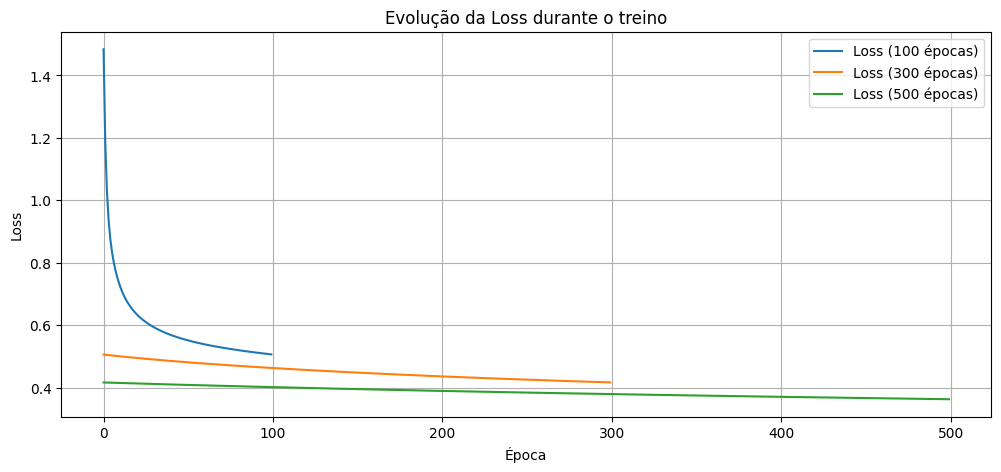

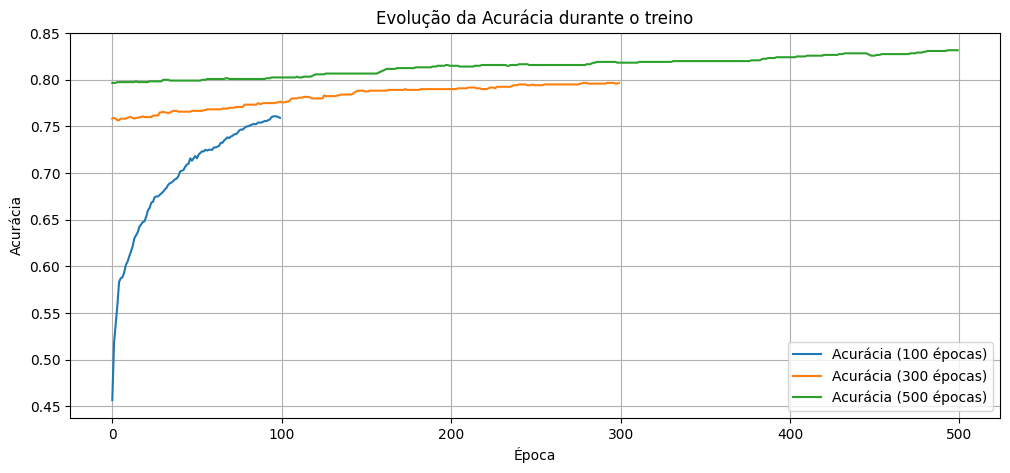

In [461]:
plt.figure(figsize=(12,5))

for n_epochs, losses in epoch_losses_3.items():
    plt.plot(losses, label=f"Loss ({n_epochs} épocas)")

plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolução da Loss durante o treino")
plt.legend()
plt.grid(True)
plt.show()

# Plot da acurácia
plt.figure(figsize=(12,5))

for n_epochs, accs in epoch_accuracy_3.items():
    plt.plot(accs, label=f"Acurácia ({n_epochs} épocas)")

plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Evolução da Acurácia durante o treino")
plt.legend()
plt.grid(True)
plt.show()

### Teste

In [485]:
kwargs_test_3 = {
                "input": test_sample_norm_3, 
                "output": test_sample_labels_3, 
                "W_hidden": W_hidden_train_3, 
                "b_hidden": b_hidden_train_3, 
                "W_output": W_output_train_3, 
                "b_output": b_output_train_3, 
                "eta": .001, 
                "hidden_activation": activation_array[0], 
                "hidden_activation_d": activation_d_array[0], 
                "output_activation": activation_array[1],
                "output_activation_d": activation_d_array[1], 
                "loss_function": cce,
                "loss_function_d": cce_d
            }

In [486]:
# Iniciando o treinamento
mlp_object_test_3 = data.MLP(**kwargs_test_3)

In [487]:
def accuracy_from_preds(z2_act, y_true):
    # z2_act: (M, N), y_true: one-hot (M, N) ou indices (N,)
    y_pred_idx = np.argmax(z2_act, axis=0)
    if y_true.ndim == 2:
        y_true_idx = np.argmax(y_true, axis=0)
    else:
        y_true_idx = y_true
    return np.mean(y_pred_idx == y_true_idx), y_pred_idx, y_true_idx

In [488]:
z1p, z1a, z2p, z2a = mlp_object_test_3.forward()
acc_test, preds_idx, true_idx = accuracy_from_preds(z2a, test_sample_labels_3) 
print(f"Acurácia no teste: {acc_test*100:.2f}%")

Acurácia no teste: 83.25%


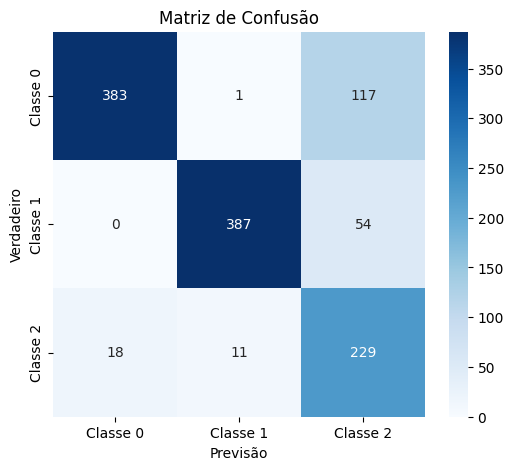

In [493]:
from sklearn.metrics import confusion_matrix

def confusion_matrix(preds, trues, n_classes):
    cm = np.zeros((n_classes, n_classes), dtype=int)
    for p, t in zip(preds, trues):
        cm[t, p] += 1   # linha: true, coluna: pred
    return cm

cm = confusion_matrix(true_idx, preds_idx, N_CLASSES_3)
classes = [f"Classe {i}" for i in range(cm.shape[0])]

# plota com seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)

plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()